In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup as bs
from datetime import datetime
from matplotlib import pyplot as plt
from collections import defaultdict
import json
import os
import seaborn as sns
import numpy as np  

import warnings
warnings.filterwarnings("ignore")

/Users/kaanguraysirin/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
df=pd.read_csv('edit_history.csv')
df.head()

,name,party,article_size,Ocak 2013,Şubat 2013,Mart 2013,Nisan 2013,Mayıs 2013,Haziran 2013,Temmuz 2013,...,Mart 2024,Nisan 2024,Mayıs 2024,Haziran 2024,Temmuz 2024,Ağustos 2024,Eylül 2024,Ekim 2024,Kasım 2024,Aralık 2024
0,Recep_Tayyip_Erdoğan,adalet_ve_kalkınma_partisi,205724.0,0,0,0,0,0,0,0,...,-156,850,21,294,0,0,0,0,0,0
1,Kemal_Kılıçdaroğlu,cumhuriyet_halk_partisi,130819.0,30,11,-455,-2,-4,293,0,...,0,-6,4,0,0,0,0,0,0,0
2,Binali_Yıldırım,adalet_ve_kalkınma_partisi,125429.0,252,0,2873,8,0,0,-46,...,57,0,-48,0,0,0,0,0,0,0
3,Devlet_Bahçeli,milliyetçi_hareket_partisi,106094.0,0,0,-116,0,-35,3,23,...,396,116,18,0,0,0,0,0,0,0
4,Ali_Babacan,deva_partisi,85861.0,-699,1,-259,0,0,0,32,...,-137,82,0,0,0,0,0,0,0,0


In [3]:
#new df of party column and absolute values of columns 3 to end
df_abs = df.iloc[:, 3:].abs()
df_abs['party'] = df['party']
df_abs.head()



,Ocak 2013,Şubat 2013,Mart 2013,Nisan 2013,Mayıs 2013,Haziran 2013,Temmuz 2013,Ağustos 2013,Eylül 2013,Ekim 2013,...,Nisan 2024,Mayıs 2024,Haziran 2024,Temmuz 2024,Ağustos 2024,Eylül 2024,Ekim 2024,Kasım 2024,Aralık 2024,party
0,0,0,0,0,0,0,0,190,1501,849,...,850,21,294,0,0,0,0,0,0,adalet_ve_kalkınma_partisi
1,30,11,455,2,4,293,0,1,1,0,...,6,4,0,0,0,0,0,0,0,cumhuriyet_halk_partisi
2,252,0,2873,8,0,0,46,0,0,10,...,0,48,0,0,0,0,0,0,0,adalet_ve_kalkınma_partisi
3,0,0,116,0,35,3,23,0,285,0,...,116,18,0,0,0,0,0,0,0,milliyetçi_hareket_partisi
4,699,1,259,0,0,0,32,0,278,0,...,82,0,0,0,0,0,0,0,0,deva_partisi


In [4]:
#group by party and sum the values
df_abs = df_abs.groupby('party').sum()

#make the index a column
df_abs.reset_index(level=0, inplace=True)

#add a new row as the sum of all the values
df_abs.loc['Total'] = df_abs.sum()
#make the party column of the last row as 'Total'
df_abs.loc['Total', 'party'] = 'Total'
#merge the columns 2 to end a list

df_abs['time_series'] = df_abs.iloc[:,1:].apply(lambda x: x.tolist(), axis=1)
df_abs['time_series'] = df_abs.apply(lambda x: [i/(max(x['time_series'])) for i in x['time_series']], axis=1)

#make the party as a column

#drop the columns 2 to end
df_abs=df_abs.drop(df_abs.columns[1:-1],axis=1)
df_abs.head(16)



,party,time_series
0,adalet_ve_kalkınma_partisi,"[0.0654020160330185, 0.002920866735455195, 0.0..."
1,bağımsız,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.154..."
2,cumhuriyet_halk_partisi,"[0.003472464172066987, 0.00019743107332822335,..."
3,demokrat_parti,"[0.0, 0.09951353637901861, 0.0, 0.002538071065..."
4,deva_partisi,"[0.015400546399929497, 2.2032255221644486e-05,..."
5,gelecek_partisi,"[0.004316873674644047, 0.0, 0.0566495001514692..."
6,halkların_demokratik_partisi,"[0.0, 0.0, 0.006790123456790123, 0.0, 0.0, 0.0..."
7,halkların_eşitlik_ve_demokrasi_partisi,"[0.3415365396627108, 0.0007495315427857589, 0...."
8,iyi_parti,"[0.05243764172335601, 0.0, 0.01436130007558579..."
9,milliyetçi_hareket_partisi,"[0.0, 0.0, 0.008384710234278668, 0.00014091949..."


In [5]:
df_abs.shape

(14, 2)

In [6]:
#make all date columns to a series, from column 3 to the end
df['time_series'] = df.iloc[:,3:].apply(lambda x: x.tolist(), axis=1)
#drop all columns except the first 3 and the last one
df=df.drop(df.columns[3:-1],axis=1)


#normalize wrt article size, BAD
#df['time_series'] = df.apply(lambda x: [i/x['article_size'] for i in x['time_series']], axis=1)
#normalize wrt max value, BETTER
df['time_series'] = df.apply(lambda x: [i/max(abs(max(x['time_series'])),abs(min(x['time_series']))) for i in x['time_series']], axis=1)

lambda_party = lambda x: "AKP" if x == "adalet_ve_kalkınma_partisi" else "CHP" if x == "cumhuriyet_halk_partisi" else "MHP" if x == "milliyetçi_hareket_partisi" else "HDP" if x == "halkların_demokratik_partisi" else "İYİ" if x == "iyi_parti" else "DEM" if x=="halkların_eşitlik_ve_demokrasi_partisi" else "Diğer"
df['party_abv'] = df['party'].apply(lambda_party)

df.head()


,name,party,article_size,time_series,party_abv
0,Recep_Tayyip_Erdoğan,adalet_ve_kalkınma_partisi,205724.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00366958...",AKP
1,Kemal_Kılıçdaroğlu,cumhuriyet_halk_partisi,130819.0,"[0.0007872775940796725, 0.00028866845116254657...",CHP
2,Binali_Yıldırım,adalet_ve_kalkınma_partisi,125429.0,"[0.007927769213829552, 0.0, 0.0903828609179853...",AKP
3,Devlet_Bahçeli,milliyetçi_hareket_partisi,106094.0,"[0.0, 0.0, -0.004086665492337502, 0.0, -0.0012...",MHP
4,Ali_Babacan,deva_partisi,85861.0,"[-0.015400546399929497, 2.2032255221644486e-05...",Diğer


In [7]:
#group by party


In [8]:
#unique party names
df['party'].unique()

array(['adalet_ve_kalkınma_partisi', 'cumhuriyet_halk_partisi',
       'milliyetçi_hareket_partisi', 'deva_partisi', 'iyi_parti',
       'gelecek_partisi', 'zafer_partisi', 'türkiye_i̇şçi_partisi',
       'bağımsız', 'halkların_demokratik_partisi',
       'halkların_eşitlik_ve_demokrasi_partisi', 'demokrat_parti',
       'yenilik_partisi'], dtype=object)

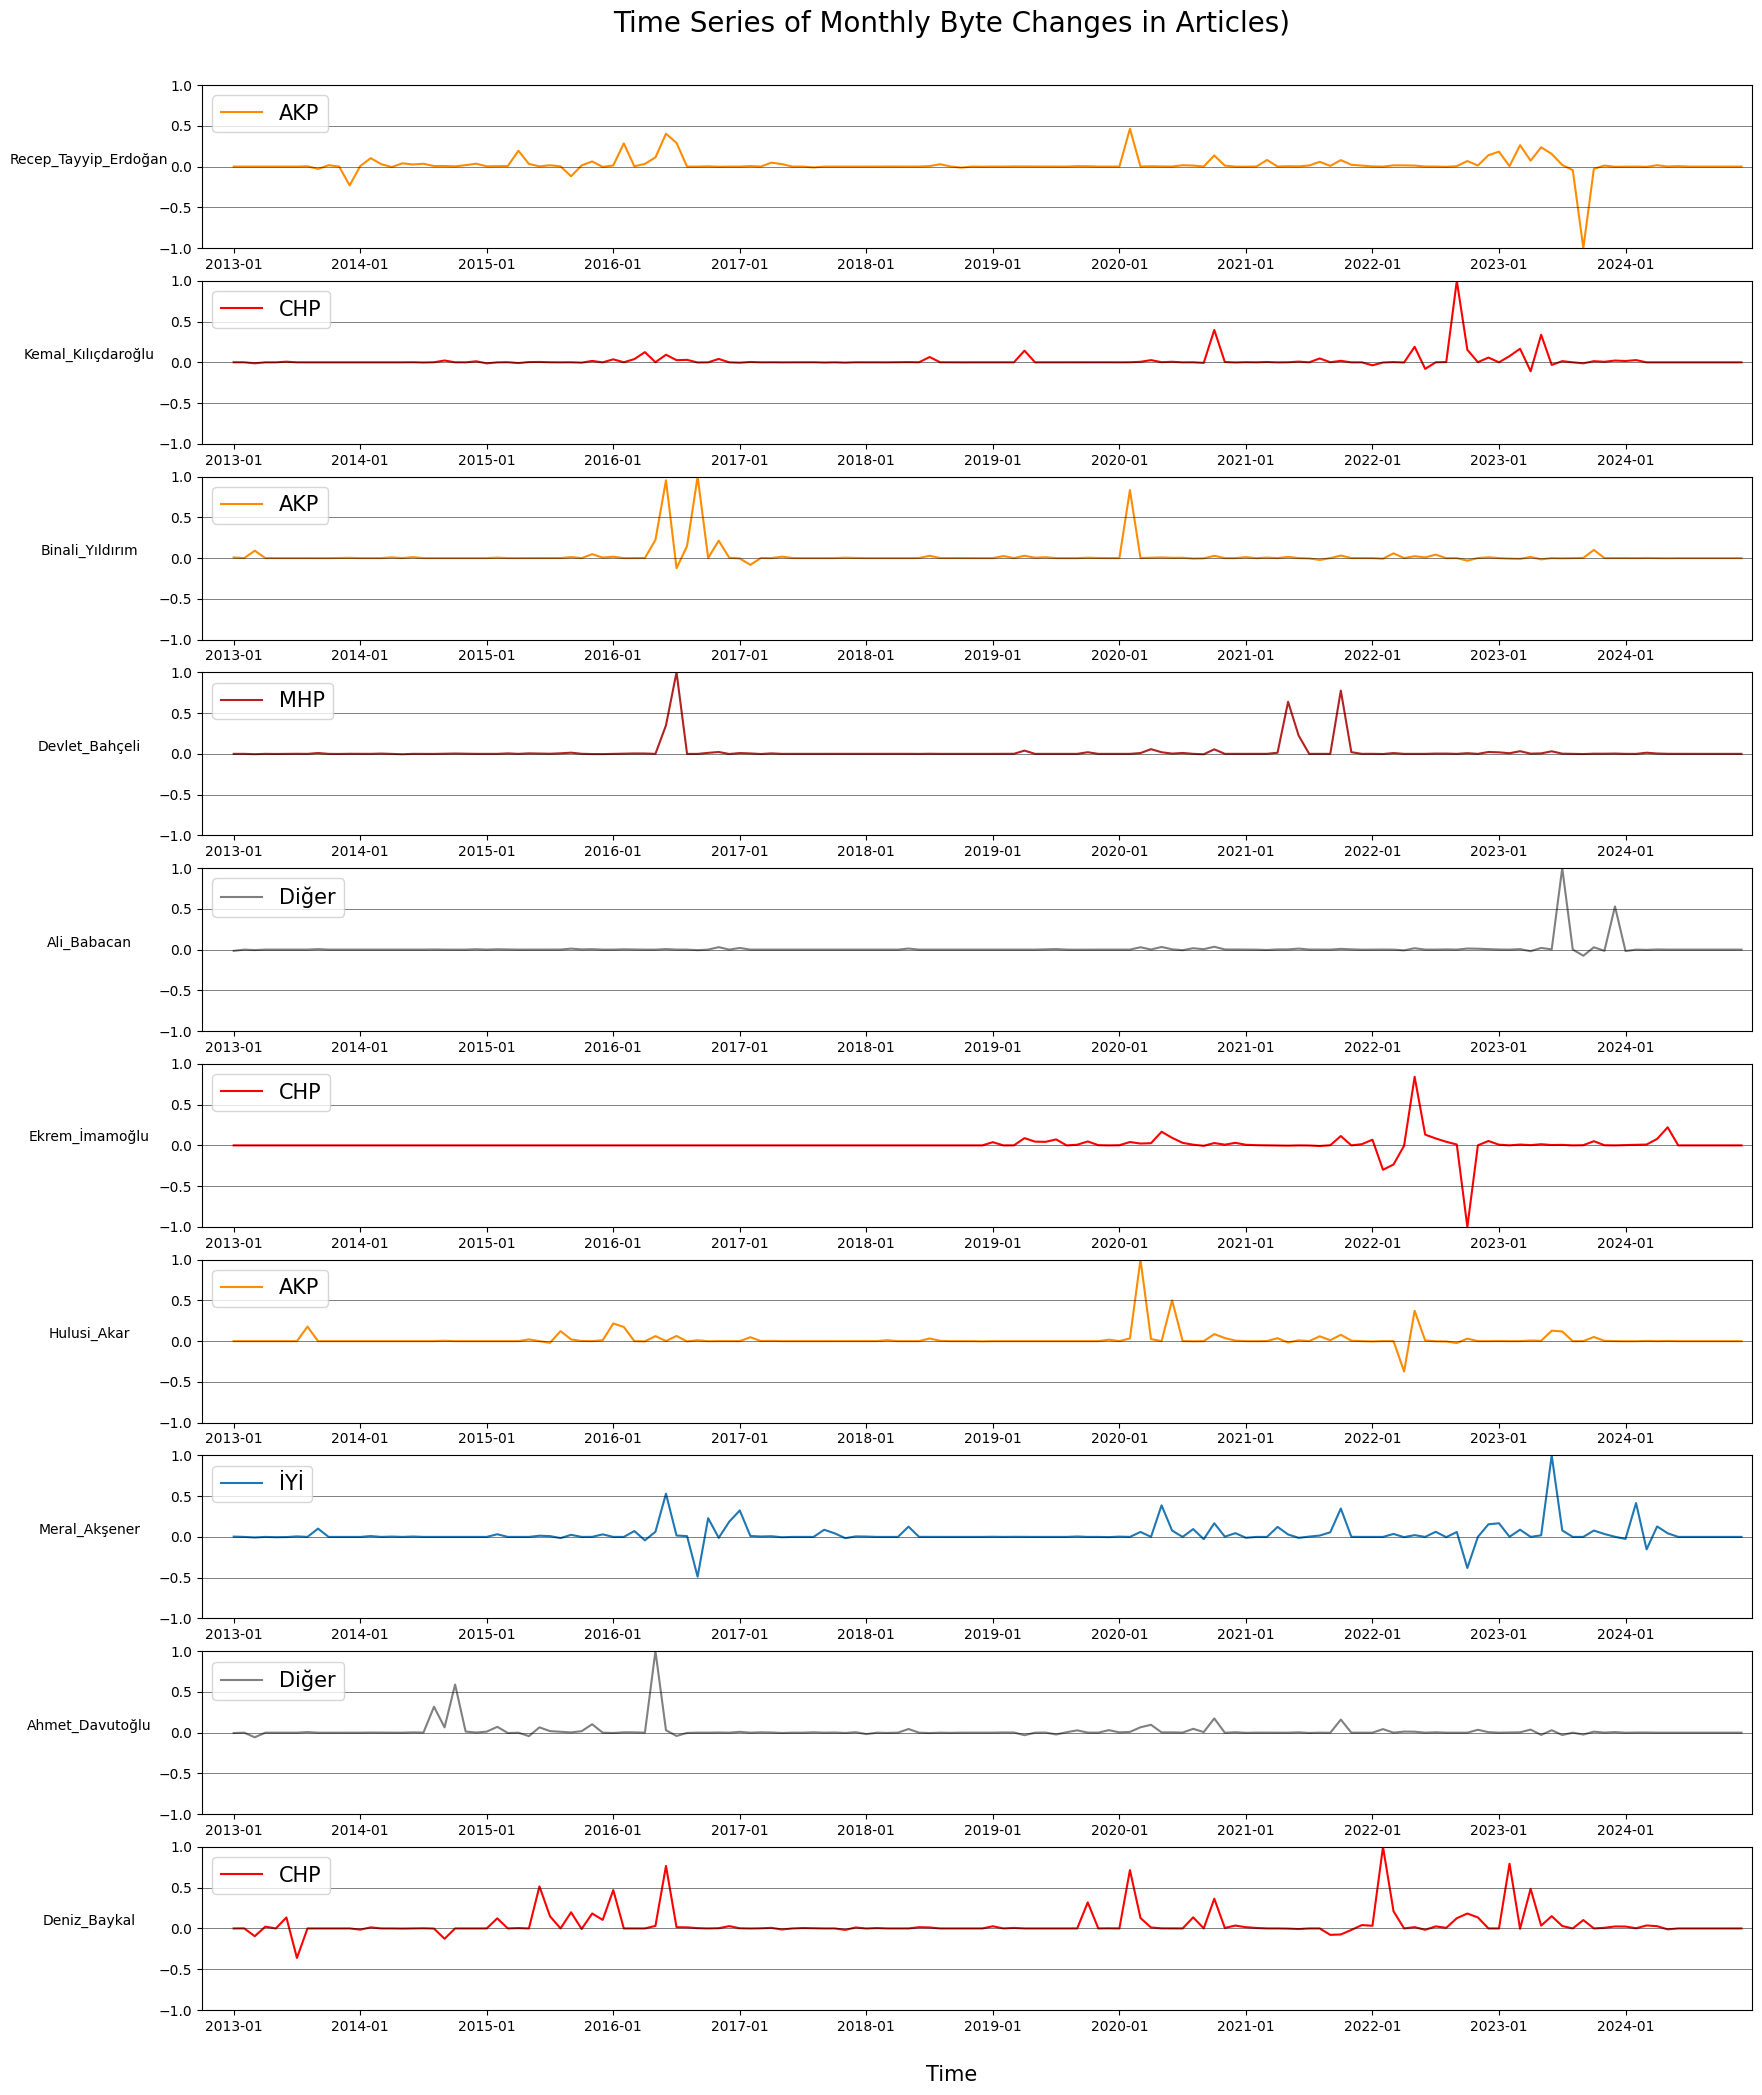

In [9]:
#df_filtered = df[df['name'].isin(["Ahmet_Şık","Abdüllatif_Şener", "Recep_Tayyip_Erdoğan", "Tanju_Özcan", "Tuğrul_Türkeş", "Ahmet_Eşref_Fakıbaba", "Bülent_Kuşoğlu", "Pervin_Buldan", "Mehmet_Bekaroğlu", "Meral_Akşener"])]
#df_filtered = df[df['name'].isin(['Recep_Tayyip_Erdoğan', 'Devlet_Bahçeli', 'Binali_Yıldırım', 'Ahmet_Davutoğlu',"Mehmet_Şimşek","Fatma_Betül_Sayan_Kaya","Meral_Akşener"])]
#df_filtered = df[df['party_abv'] == 'MHP']
#df_filtered = df[df['party'] == 'adalet_ve_kalkınma_partisi']
df_filtered=df
#df_filtered = df_abs
num=len(df_filtered) if df_filtered.shape[0] < 10 else 10

party_colors = {"AKP": "darkorange", "CHP": "red", "MHP": "firebrick", "HDP": "green", "İYİ": "#1f77b4", "Diğer": "gray", "DEM": "purple"}

fig, ax = plt.subplots(num, 1, figsize=(20, num*2.5))

for i in range(num):
    #ax[i].plot(df_filtered.iloc[i]['time_series'])
    ax[i].plot(df_filtered.iloc[i]['time_series'], color=party_colors[df_filtered.iloc[i]['party_abv']])
    
    #set the limit of y axis to 1
    ax[i].set_ylim(-1,1)
    ax[i].set_xlim(-3,144)

    ax[i].set_yticks([-1,-0.5,0,0.5,1])
    ax[i].hlines(y=[0.5,0, -0.5], xmin=-5, xmax=144, color='black', alpha=0.5, linewidth=0.7)

    ax[i].set_xticks(range(0,144,12))
    ax[i].set_xticklabels([datetime(2013 + j//12, 1 + j%12, 1).strftime('%Y-%m') for j in range(0,144,12)])    
    ax[i].set_ylabel(df_filtered.iloc[i]['name'], rotation=0, labelpad=50, color="black")

    ax[i].legend([df_filtered.iloc[i]['party_abv']], loc='upper left', fontsize=15)

fig.suptitle("Time Series of Monthly Byte Changes in Articles)", fontsize=20, y=0.91)
fig.supxlabel("Time", fontsize=15, y=0.08)
plt.show()



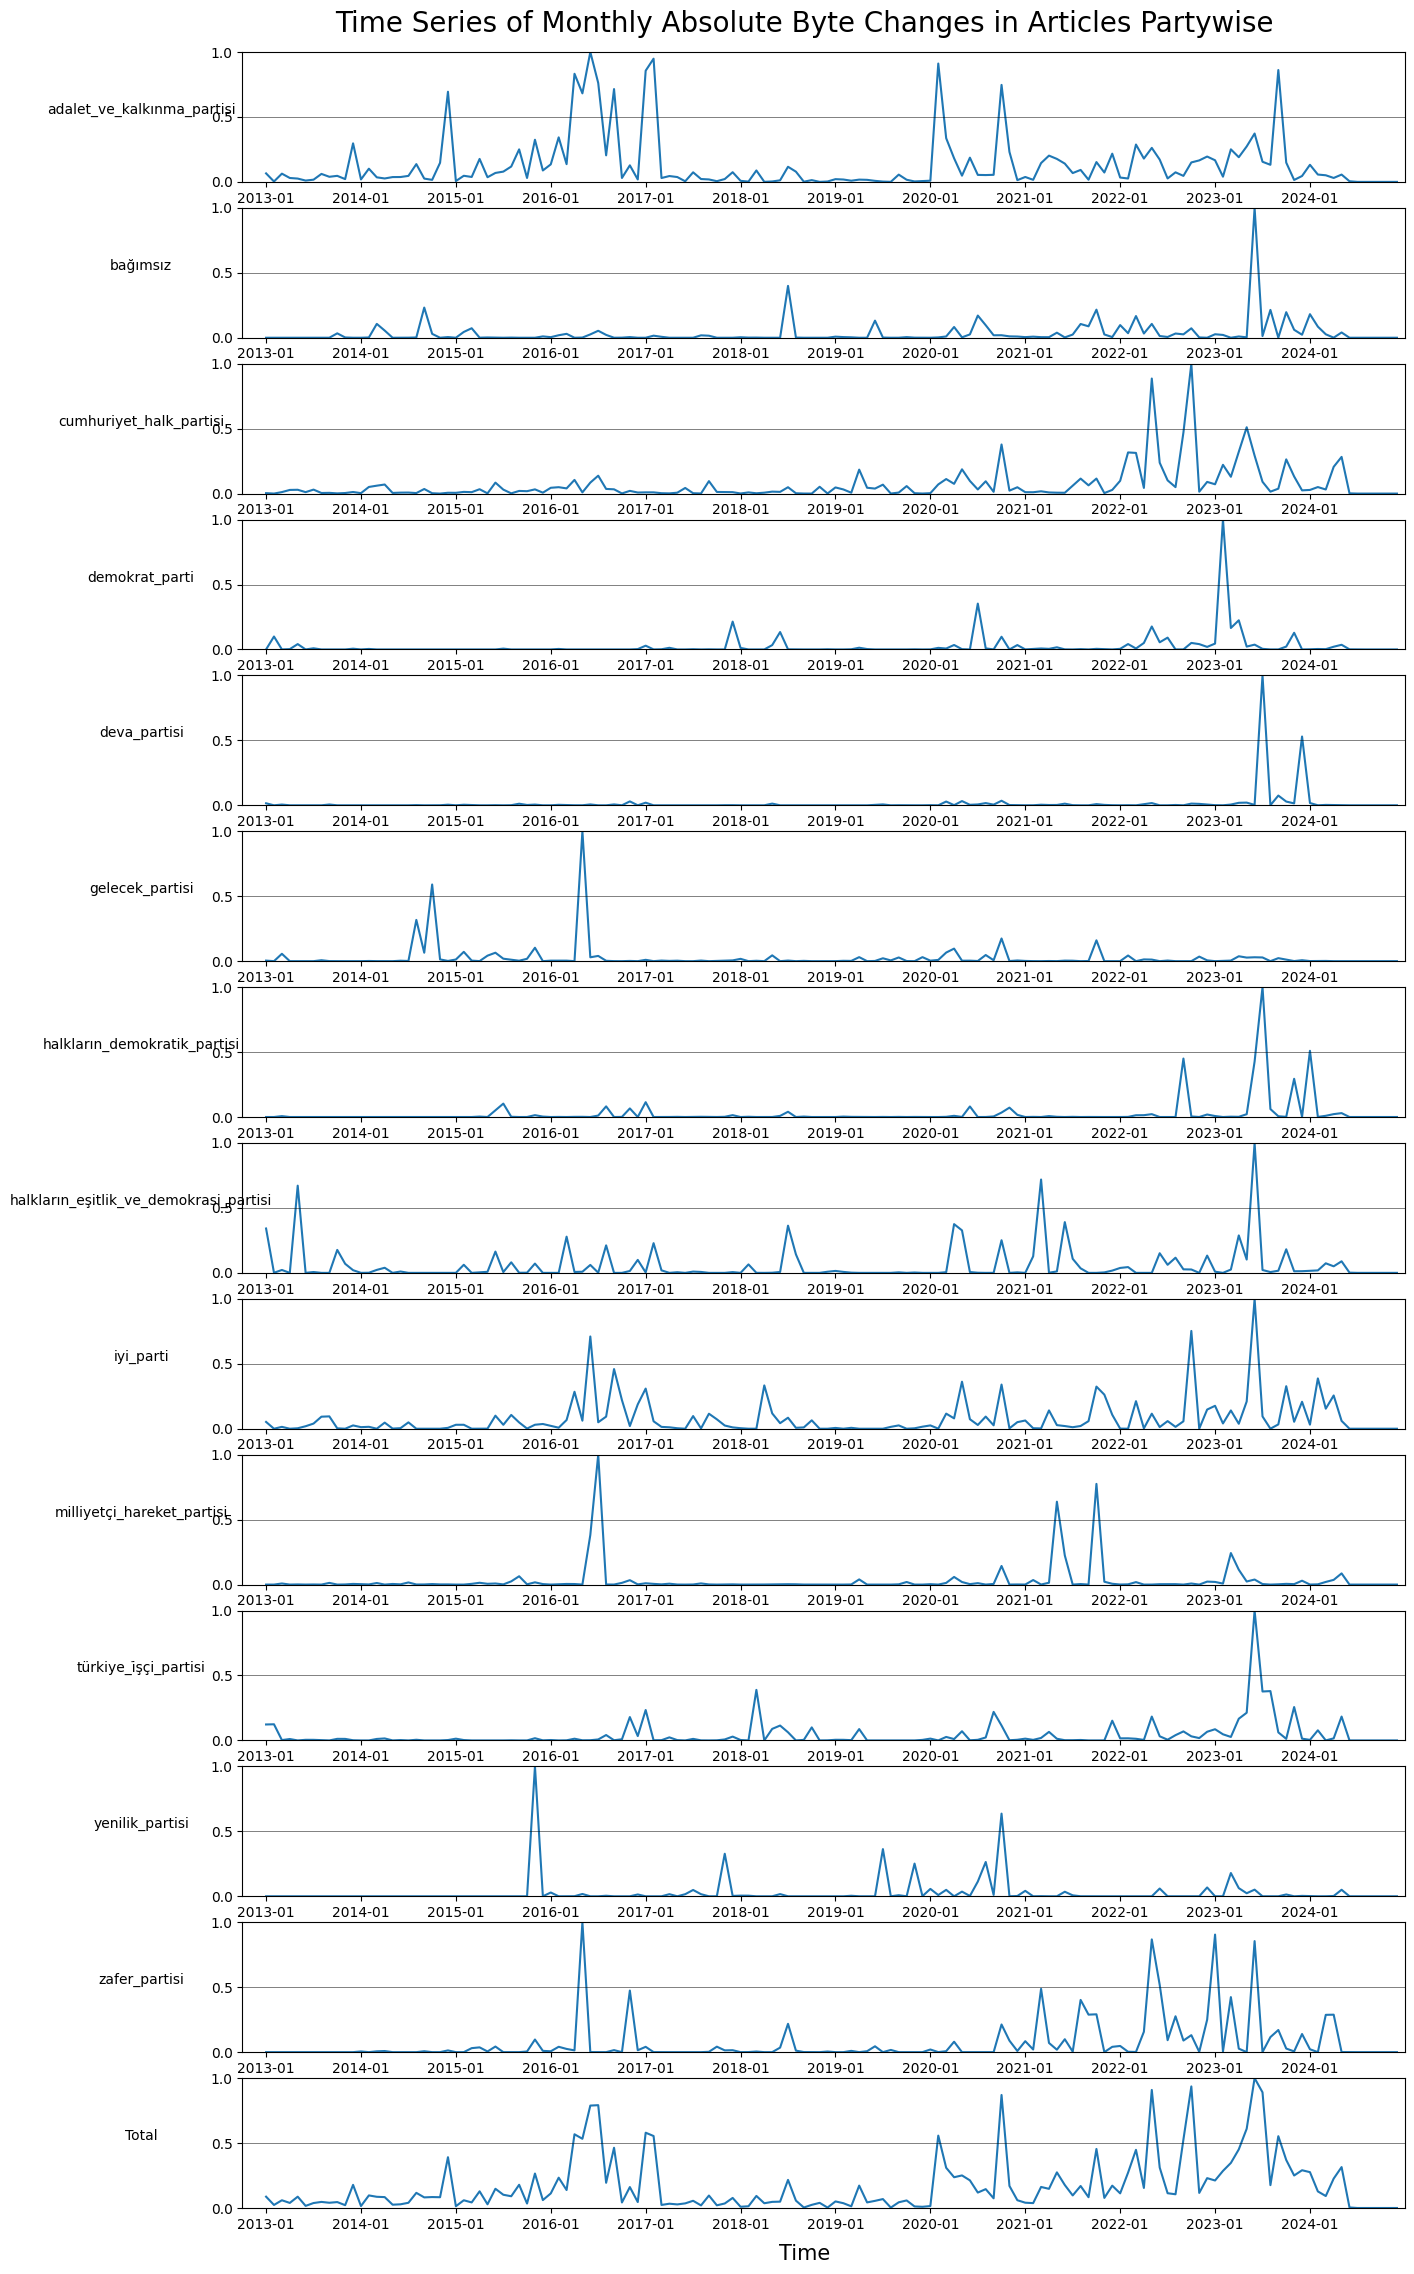

In [10]:
df_filtered = df_abs
num=len(df_filtered) #if df_filtered.shape[0] < 10 else 10

party_colors = {"AKP": "darkorange", "CHP": "red", "MHP": "firebrick", "HDP": "green", "İYİ": "#1f77b4", "Diğer": "gray", "DEM": "purple"}

fig, ax = plt.subplots(num, 1, figsize=(15, num*2))

for i in range(num):
    ax[i].plot(df_filtered.iloc[i]['time_series'])
    
    #set the limit of y axis to 1
    ax[i].set_ylim(0,1)
    ax[i].set_xlim(-3,144)

    ax[i].set_yticks([0,0.5,1])
    ax[i].hlines(y=[0.5], xmin=-5, xmax=144, color='black', alpha=0.5, linewidth=0.7)

    ax[i].set_xticks(range(0,144,12))
    ax[i].set_xticklabels([datetime(2013 + j//12, 1 + j%12, 1).strftime('%Y-%m') for j in range(0,144,12)])
    #raise the y axis label
    ax[i].set_ylabel(df_filtered.iloc[i]['party'], rotation=0, labelpad=50, color="black")

fig.suptitle("Time Series of Monthly Absolute Byte Changes in Articles Partywise", fontsize=20, y=0.895)
fig.supxlabel("Time", fontsize=15, y=0.09)
plt.show()